## 수평선, 수직선 그래프

- 수평선: `plt.hlines(y, xmin, xmax, colors=None, linestyles='solid')`
- 수직선: `plt.vlines(x, ymin, ymax, colors=None, linestyles='solid')`

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-yb7x2hhb because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


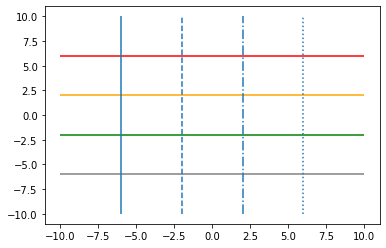

In [1]:
import matplotlib.pyplot as plt

plt.hlines(-6, -10, 10, color='gray')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')
plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

## 함수식 그래프

`plt.plot(x축, 함수식, data=df, c='color')`

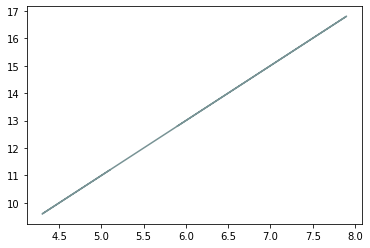

In [2]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

# 그래프
def linear_func(x):
    return 2 * x + 1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='#789395')
plt.show()

## 회귀선 그래프

`numpy.polyfit(X, Y, 차수)`

함수 결과 값은 차수 + 1개 출력, 가장 높은 차원의 계수부터 순서대로 출력

**(1) X축 'sepal length (cm)', Y축 'petal length (cm)' `산점도`, 그 위에 'sepal length (cm)', 'petal length (cm)'에대한 `일차식 그래프`**

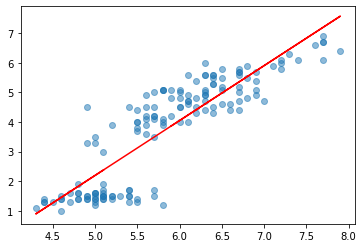

In [3]:
import numpy as np
X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b1*X + b0, color='red')
plt.show()

**(2) `2차식 그래프` (2이상의 그래프를 그리는 경우 데이터를 X값에 대하여 정렬해야 함)**

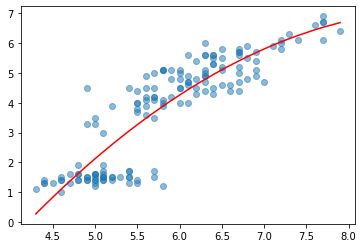

In [4]:
iris2 = iris.sort_values(by='sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(x=X, y=Y, alpha=0.5)
plt.plot(X, b0 + b1*X + b2*X**2, color='red')
plt.show()

## 꺽은선 그래프

**(1) 시간의 변화에 따라 값이 지속적으로 변화할 때 유용. (주로 X축이 시점, Y축이 값)**

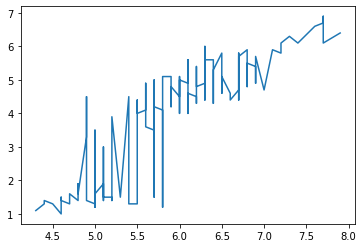

In [5]:
iris2 = iris.sort_values(by='sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2)
plt.show()

**(2) 카테고리에 따라 분리된 그래프**

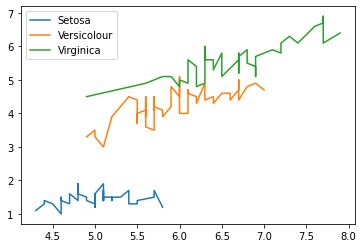

In [6]:
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['Class'] == 'Virginica'])
plt.legend(iris2.Class.unique())
plt.show()